<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/Axial_Length_Prediction_ML_Regression_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

### Mounting and Loading dataset from google drive

In [2]:
df=pd.read_excel('/content/drive/MyDrive/Axial length prediction.xlsx')

In [4]:
df.shape

(108, 3)

### Exploring the dataset

In [3]:
# find first 5 rows and columns
df.head()

,KH,KV,AL
0,41.5,40.50,20.30
1,41.5,40.50,20.56
2,41.5,40.50,20.61
3,41.5,40.75,20.79
4,42.0,41.00,21.10


In [5]:
# find last 5 rows and columns
df.tail()

,KH,KV,AL
103,47.25,47.0,23.90
104,47.50,47.5,24.00
105,47.50,47.5,24.04
106,47.75,48.0,24.08
107,47.75,48.5,24.20


In [6]:
# find descriptive statistics
df.describe()

,KH,KV,AL
count,108.000000,108.000000,108.000000
mean,44.756481,44.129167,22.704167
std,1.551636,1.760219,0.791164
min,41.500000,40.500000,20.300000
25%,43.500000,42.750000,22.305000
50%,44.750000,44.000000,22.775000
75%,46.000000,45.500000,23.222500
max,47.750000,48.500000,24.200000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KH      108 non-null    float64
 1   KV      108 non-null    float64
 2   AL      108 non-null    float64
dtypes: float64(3)
memory usage: 2.7 KB


In [8]:
df.isnull().sum()

KH    0
KV    0
AL    0
dtype: int64

Text(0.5, 1.0, 'Dataset scatter plot')

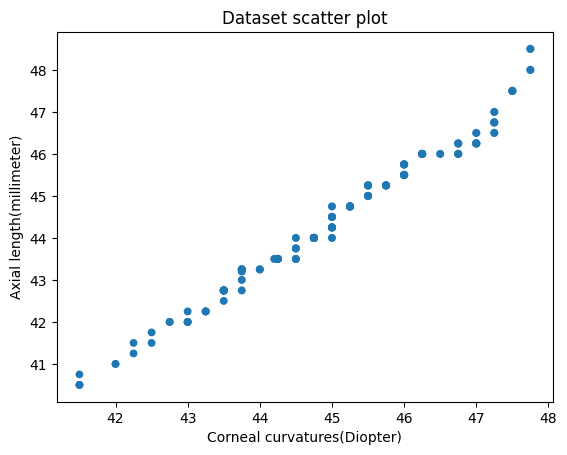

In [9]:
# plotting scatter plot for visualising data distribution of corneal curvatures before outliers removal
plt.scatter(df.KH, df.KV, df.AL)
plt.xlabel('Corneal curvatures(Diopter)')
plt.ylabel('Axial length(millimeter)')
plt.title('Dataset scatter plot')

<Axes: >

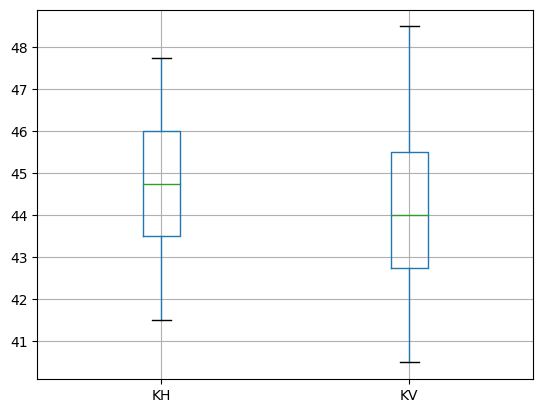

In [10]:
# creating Box and Whiskers plots for corneal curvatures
df.boxplot(['KH','KV'])

<Axes: >

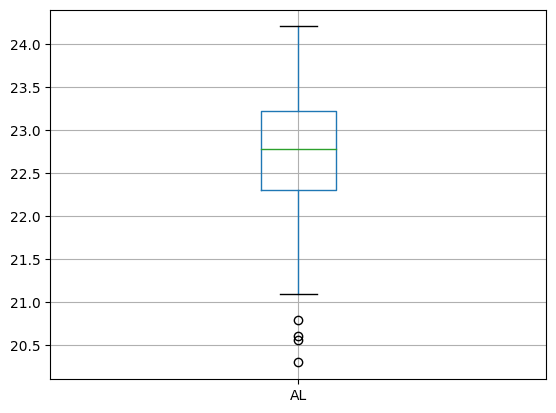

In [11]:
# creating Box and Whiskers plots for axial length
df.boxplot(['AL'])

### Outliers detection and removal

In [12]:
Q1 = df.AL.quantile(0.25)
Q2 = df.AL.quantile(0.50)
Q3 = df.AL.quantile(0.75)
Q1, Q2,Q3

(22.305, 22.775, 23.2225)

In [13]:
IQR = Q3-Q1
IQR

0.9175000000000004

In [14]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit, upper_limit

(20.92875, 24.598750000000003)

In [15]:
df[(df.AL<lower_limit)|(df.AL>upper_limit)]

,KH,KV,AL
0,41.5,40.50,20.30
1,41.5,40.50,20.56
2,41.5,40.50,20.61
3,41.5,40.75,20.79


In [16]:
df_no_outliers = df[(df.AL>lower_limit)
&(df.AL<upper_limit)]

df_no_outliers

,KH,KV,AL
4,42.00,41.00,21.10
5,42.00,41.00,21.25
6,42.25,41.25,21.38
7,42.25,41.50,21.46
8,42.50,41.50,21.50
...,...,...,...
103,47.25,47.00,23.90
104,47.50,47.50,24.00
105,47.50,47.50,24.04
106,47.75,48.00,24.08


In [17]:
df_no_outliers.describe()

,KH,KV,AL
count,104.000000,104.000000,104.000000
mean,44.881731,44.266346,22.786442
std,1.439931,1.644754,0.681550
min,42.000000,41.000000,21.100000
25%,43.750000,43.150000,22.380000
50%,44.875000,44.000000,22.825000
75%,46.000000,45.500000,23.237500
max,47.750000,48.500000,24.200000


Text(0.5, 1.0, 'Dataset scatter plot')

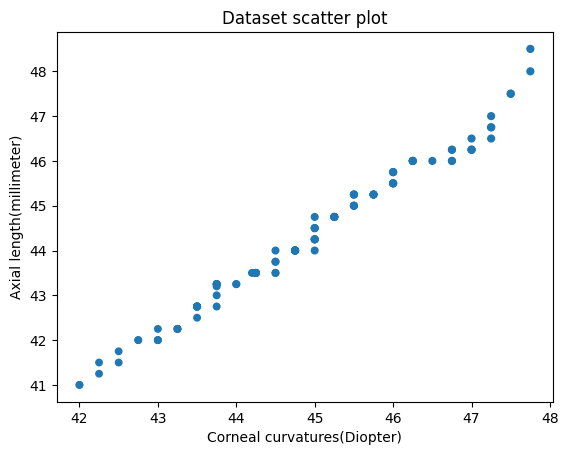

In [18]:
# plotting scatter plot for visualising data distribution of corneal curvatures after outliers removal
plt.scatter(df_no_outliers.KH, df_no_outliers.KV, df_no_outliers.AL)
plt.xlabel('Corneal curvatures(Diopter)')
plt.ylabel('Axial length(millimeter)')
plt.title('Dataset scatter plot')

<Axes: >

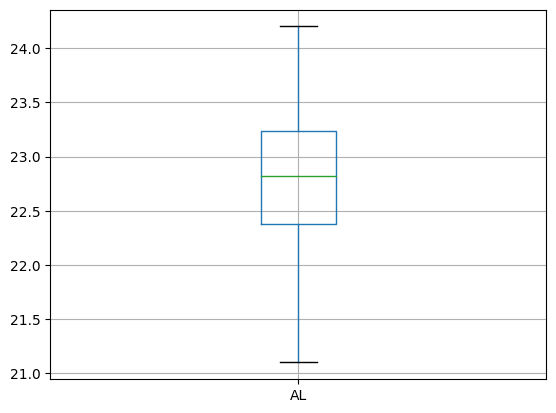

In [19]:
df_no_outliers.boxplot('AL')

In [20]:
df_no_outliers.describe()

,KH,KV,AL
count,104.000000,104.000000,104.000000
mean,44.881731,44.266346,22.786442
std,1.439931,1.644754,0.681550
min,42.000000,41.000000,21.100000
25%,43.750000,43.150000,22.380000
50%,44.875000,44.000000,22.825000
75%,46.000000,45.500000,23.237500
max,47.750000,48.500000,24.200000


### Heat map construction for correlation matrix

<Axes: >

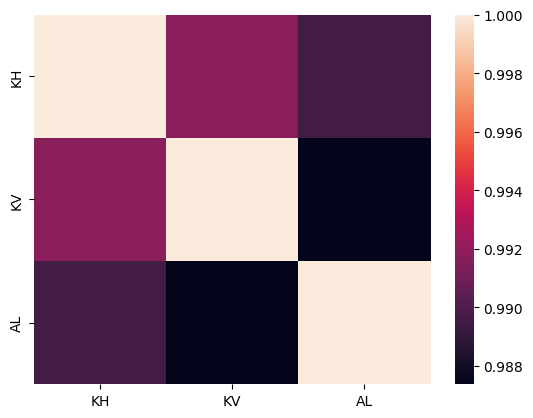

In [21]:
# constucting heat map for correlation matrix
sns.heatmap(df_no_outliers.corr())

In [22]:
df_no_outliers.corr()

,KH,KV,AL
KH,1.000000,0.991751,0.989643
KV,0.991751,1.000000,0.987376
AL,0.989643,0.987376,1.000000


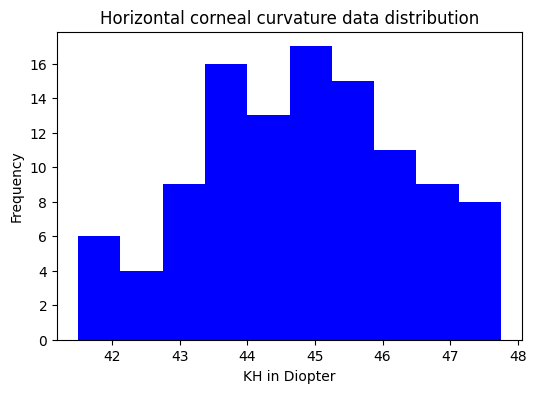

In [23]:
plt.figure(figsize = (6, 4))
x = df.KH
plt.hist(x, bins = 10, color = "blue")
plt.title("Horizontal corneal curvature data distribution")
plt.xlabel("KH in Diopter")
plt.ylabel("Frequency")
plt.show()

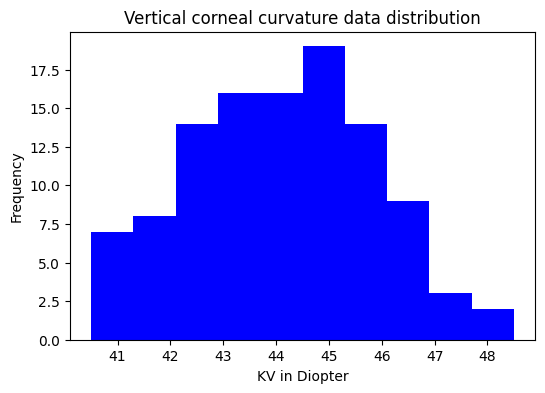

In [24]:
plt.figure(figsize = (6, 4))
x = df.KV
plt.hist(x, bins = 10, color = "blue")
plt.title("Vertical corneal curvature data distribution")
plt.xlabel("KV in Diopter")
plt.ylabel("Frequency")
plt.show()


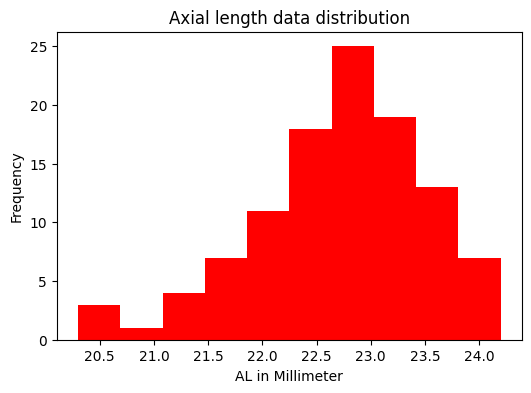

In [25]:
plt.figure(figsize = (6, 4))
x = df.AL
plt.hist(x, bins = 10, color = "red")
plt.title("Axial length data distribution")
plt.xlabel("AL in Millimeter")
plt.ylabel("Frequency")
plt.show()

### Defining X and y as independant and dependant variable

In [26]:
X = df_no_outliers.drop(['AL'], axis=1).values
y = df_no_outliers['AL'].values

In [27]:
X=df.drop(['AL'], axis=1).values
y=df['AL'].values

### Spliting the dataset into training and testing set

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)




### Fitting the prepared and split dataset for training by Linear reegression, Support vector machine algorithm, Decision tree algorithm and Random forest algorithm

In [29]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [30]:
from os import supports_bytes_environ
from sklearn.svm import SVR
supportv_model = SVR(kernel= 'linear')
supportv_model.fit(X_train, y_train)

SVR(kernel='linear')

In [31]:
from sklearn.tree import DecisionTreeRegressor
decisiont_model= DecisionTreeRegressor()
decisiont_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [32]:
from sklearn.ensemble import RandomForestRegressor
randomf_model = RandomForestRegressor()
randomf_model.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

### Models prediction on Testing set

In [36]:
# linear regression model predictions on testing set
actual = y_test
predicted_linear = linear_model.predict(X_test)
predicted_linear

array([23.36079181, 21.74145816, 23.12289074, 21.11021713, 22.09830976,
       23.88256779, 24.33939893, 21.50355709, 21.94287088, 23.36079181,
       22.96745186, 22.09830976, 22.5741119 , 22.81201298, 23.20535293,
       22.69306244, 21.82392035, 23.12289074, 23.36079181, 22.69306244,
       23.95554448, 21.58601928, 22.09830976, 23.64466672, 22.25374864,
       21.14670548, 22.96745186, 22.69306244, 22.24645097, 21.46706874,
       23.20535293, 23.47974234, 23.47974234])

In [37]:
# Support vector machine regression model predictions on testing set
actual = y_test
predicted_support = supportv_model.predict(X_test)
predicted_support

array([23.37113732, 21.79829402, 23.14298592, 21.18298592, 22.14052112,
       23.85165658, 24.34938566, 21.57014263, 21.9815158 , 23.37113732,
       22.98398061, 22.14052112, 22.5968239 , 22.8249753 , 23.21213201,
       22.7108996 , 21.86744011, 23.14298592, 23.37113732, 22.7108996 ,
       23.9415158 , 21.63928871, 22.14052112, 23.62350518, 22.29952643,
       21.22791554, 22.98398061, 22.7108996 , 22.2905405 , 21.52521301,
       23.21213201, 23.48521301, 23.48521301])

In [38]:
# Decision tree regression model predictions on testing set
actual = y_test
predicted_decision = decisiont_model.predict(X_test)
predicted_decision

array([23.2475    , 21.7       , 23.09      , 20.43      , 22.176     ,
       23.845     , 24.08      , 21.175     , 22.03      , 23.2475    ,
       23.01333333, 22.176     , 22.66      , 22.87      , 23.19      ,
       22.748     , 21.765     , 23.09      , 23.2475    , 22.748     ,
       23.845     , 21.54      , 22.176     , 23.46      , 22.40666667,
       20.43      , 23.01333333, 22.748     , 22.40666667, 21.175     ,
       23.19      , 23.42      , 23.42      ])

In [39]:
# Random forest regression model predictions on testing set
actual = y_test
predicted_random = randomf_model.predict(X_test)
predicted_random

array([23.24924103, 21.69764167, 23.10349333, 20.54148167, 22.16696127,
       23.76810429, 24.0523    , 21.32497857, 22.01277   , 23.24924103,
       23.0117781 , 22.16696127, 22.64746667, 22.8703375 , 23.17697667,
       22.74678865, 21.76214   , 23.10349333, 23.24924103, 22.74678865,
       23.834475  , 21.483075  , 22.16696127, 23.47337333, 22.40696381,
       20.54148167, 23.0117781 , 22.74678865, 22.40696381, 21.17764643,
       23.17697667, 23.41047603, 23.41047603])

In [40]:
# K nearest neighbour regression model predictions on testing set
actual = y_test
predicted_knn = knn_model.predict(X_test)
predicted_knn

array([23.278, 21.734, 23.126, 20.95 , 22.176, 23.758, 23.962, 21.458,
       21.94 , 23.278, 23.   , 22.176, 22.642, 22.902, 23.194, 22.748,
       21.832, 23.126, 23.278, 22.748, 23.898, 21.458, 22.176, 23.532,
       22.414, 20.95 , 23.   , 22.748, 22.414, 21.23 , 23.194, 23.408,
       23.408])

### Evaluate the model for the Accuracy by r2 score

In [41]:
# Accuracy of support vector regression model
from sklearn.metrics import r2_score
r2_score(actual, predicted_support)

0.9681908339112814

In [42]:
# accuracy of the linear regression model
r2_score(actual, predicted_linear)

0.9743533596736988

In [45]:
# Accuracy of K nearest neighbour regression model
r2_score(actual, predicted_knn)

0.9873785243561016

In [43]:
# Accuracy of Decision tree regression model
r2_score(actual, predicted_decision)

0.9847961845329535

In [44]:
# Accuracy of random forest regression model
r2_score(actual, predicted_random)

0.9909671481281077

### models metrics evaluation by mean absolute error and mean squared error

In [46]:
from sklearn import metrics
# support vector machine regression metrics
metrics.mean_absolute_error(actual, predicted_support),metrics.mean_squared_error(actual, predicted_support)

(0.10323799748695695, 0.024144524066822288)

In [47]:
# Multiple linear regression metrics
metrics.mean_absolute_error(actual, predicted_linear),metrics.mean_squared_error(actual, predicted_linear)

(0.0981984858802552, 0.01946690217732952)

In [48]:
# Decision tree regression metrics
metrics.mean_absolute_error(actual, predicted_decision),metrics.mean_squared_error(actual, predicted_decision)

(0.06965151515151485, 0.011540349326599262)

In [49]:
# Random forest regression metrics
metrics.mean_absolute_error(actual, predicted_random),metrics.mean_squared_error(actual, predicted_random)

(0.058403832371333064, 0.006856322759441758)

In [50]:
# K nearest neighbour regression metrics
metrics.mean_absolute_error(actual, predicted_knn),metrics.mean_squared_error(actual, predicted_knn)

(0.06381818181818155, 0.009580242424242403)

### Root mean square error (RMSE) calculation code for all the regressor models

In [53]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE for support vector regressor model
sqrt(mean_squared_error(actual, predicted_support))

0.15538508315415056

In [54]:
#calculate RMSE for linear regressor model
sqrt(mean_squared_error(actual, predicted_linear))

0.139523840892263

In [55]:
#calculate RMSE for K nearsete neighbour regressor model
sqrt(mean_squared_error(actual, predicted_knn))

0.09787871282481397

In [57]:
#calculate RMSE for Decision tree regressor model
sqrt(mean_squared_error(actual, predicted_decision))

0.10742601792209959

In [58]:
#calculate RMSE for random forest regressor model
sqrt(mean_squared_error(actual, predicted_random))

0.0828029151627028

### Verifying each model on one example from the original dataset

In [60]:
# verifying support vector machine regression model with actual values
supportv_model.predict([[47.25,	47.0]])

array([23.9415158])

In [59]:
# verifying linear regression model with actual values
linear_model.predict([[47.25,	47.0]])

array([23.95554448])

In [63]:
# verifying K nearest neighbour model with actual values
knn_model.predict([[47.25,	47.0]])

array([23.898])

In [61]:
# verifying Decision tree regression model with actual values
decisiont_model.predict([[47.25,	47.0]])

array([23.845])

In [62]:
# verifying random forest regression model with actual values
randomf_model.predict([[47.25,	47.0]])

array([23.834475])

In [64]:
df_no_outliers.tail()

,KH,KV,AL
103,47.25,47.0,23.90
104,47.50,47.5,24.00
105,47.50,47.5,24.04
106,47.75,48.0,24.08
107,47.75,48.5,24.20


## Plot the results

Text(0.5, 1.0, 'Actual vs Predicted axial length')

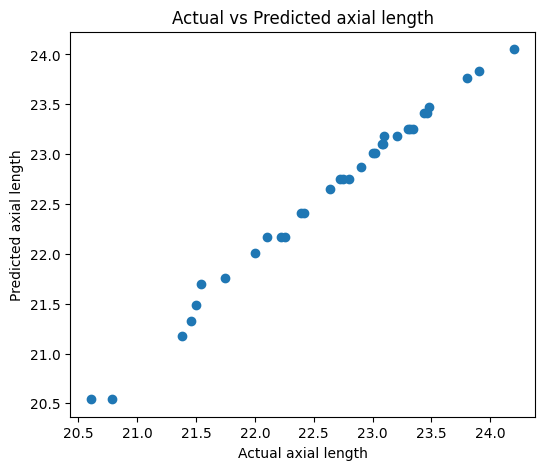

In [65]:
plt.figure(figsize=(6,5))
plt.scatter(actual,predicted_random)
plt.xlabel('Actual axial length')
plt.ylabel('Predicted axial length')
plt.title('Actual vs Predicted axial length')

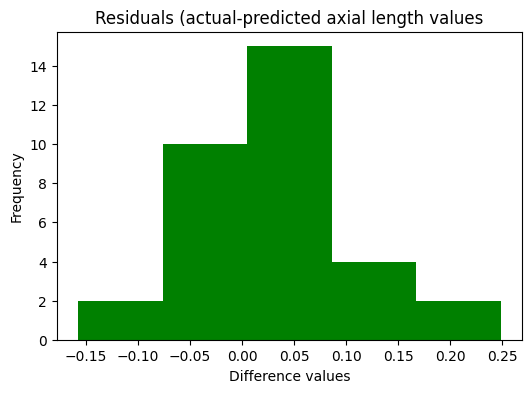

In [66]:
plt.figure(figsize = (6, 4))
plt.hist(actual-predicted_random, bins=5, color = "green")
plt.title("Residuals (actual-predicted axial length values")
plt.xlabel("Difference values")
plt.ylabel("Frequency")
plt.show()


In [67]:
linear_model.coef_, linear_model.intercept_

(array([0.32984876, 0.14595338]), 1.5103816265249073)

### Predictive regression model equation
y=m1X1+m2X3+b

Predicted AL= 0.329*KH+0.145*KV+1.51



### Ploting partial dependency plots for the features

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_diabetes
from sklearn.inspection import PartialDependenceDisplay
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [69]:
data = pd.read_excel('/content/drive/MyDrive/Axial length prediction.xlsx')
X = pd.DataFrame(data)
y = data.AL

tree = DecisionTreeRegressor()
mlp = make_pipeline(
    StandardScaler(),
    MLPRegressor(hidden_layer_sizes=(100, 100), tol=1e-2, max_iter=500, random_state=0),
)
tree.fit(X, y)
mlp.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500,
                              random_state=0, tol=0.01))])

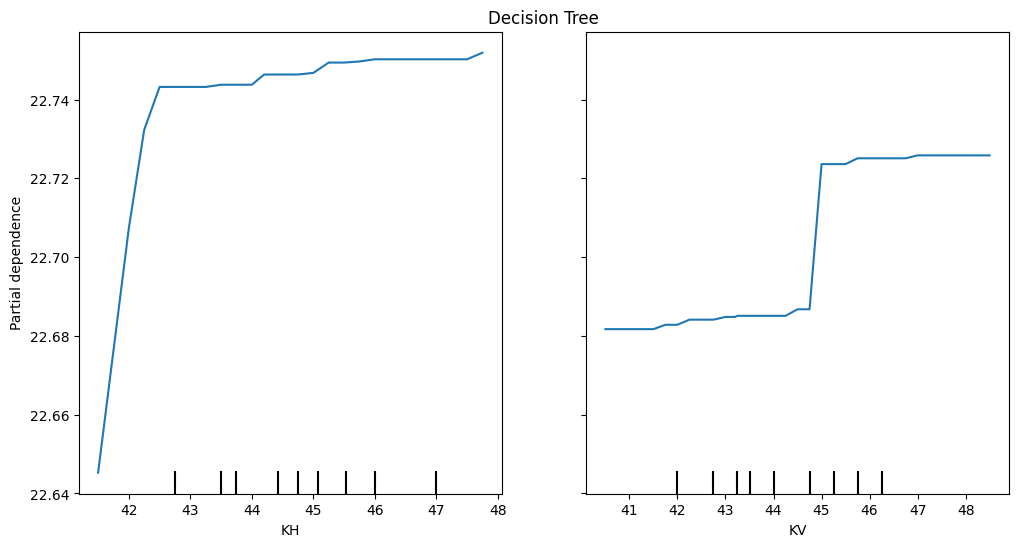

In [70]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree")
tree_display = PartialDependenceDisplay.from_estimator(tree, X, ["KH", "KV"], ax=ax)





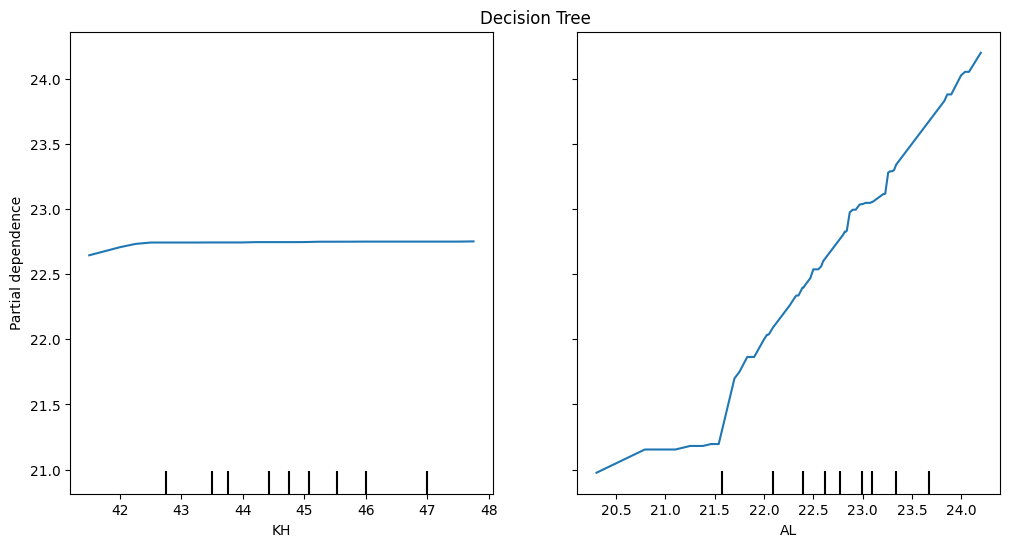

In [71]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree")
tree_display = PartialDependenceDisplay.from_estimator(tree, X, ["KH", "AL"], ax=ax)




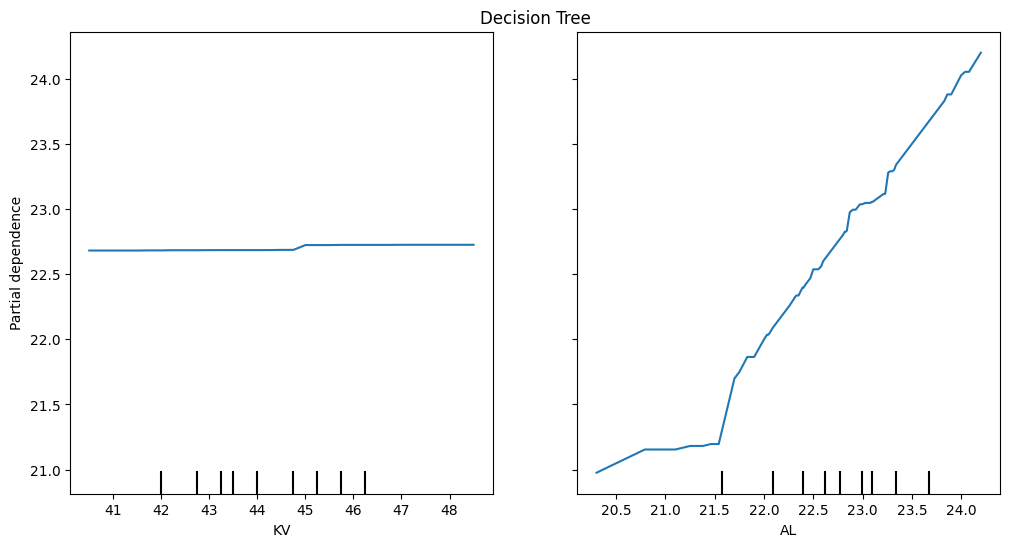

In [72]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree")
tree_display = PartialDependenceDisplay.from_estimator(tree, X, ["KV", "AL"], ax=ax)




In [73]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor()
mlp = make_pipeline(
    StandardScaler(),
    MLPRegressor(hidden_layer_sizes=(100, 100), tol=1e-2, max_iter=500, random_state=0),
)
random.fit(X, y)
mlp.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500,
                              random_state=0, tol=0.01))])

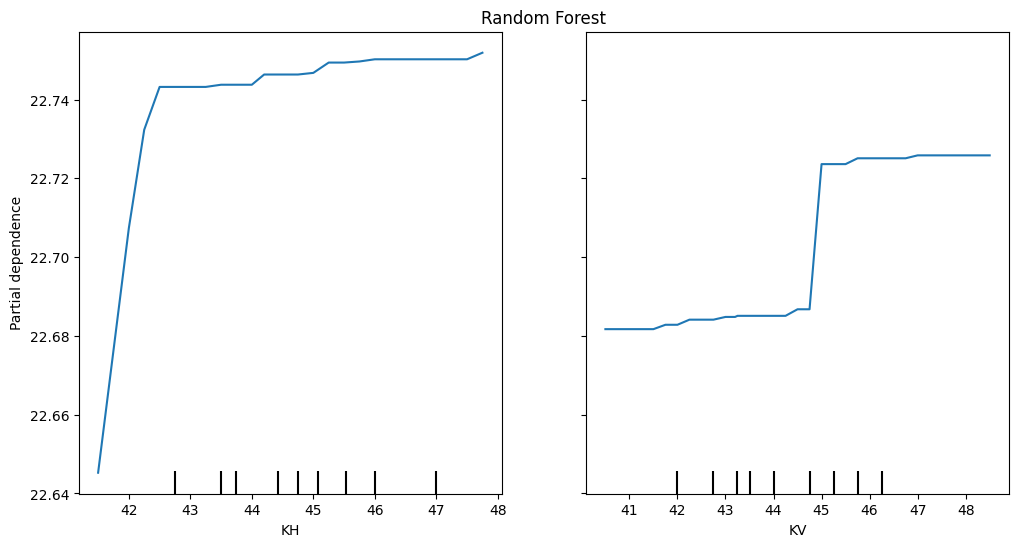

In [74]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Random Forest")
random_display = PartialDependenceDisplay.from_estimator(tree, X, ["KH", "KV"], ax=ax)




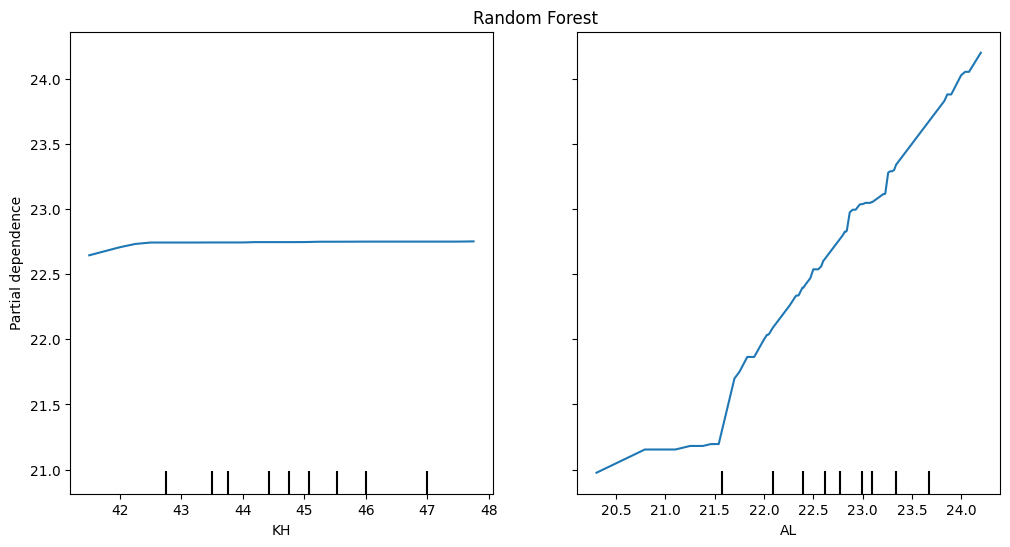

In [75]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Random Forest")
random_display = PartialDependenceDisplay.from_estimator(tree, X, ["KH", "AL"], ax=ax)




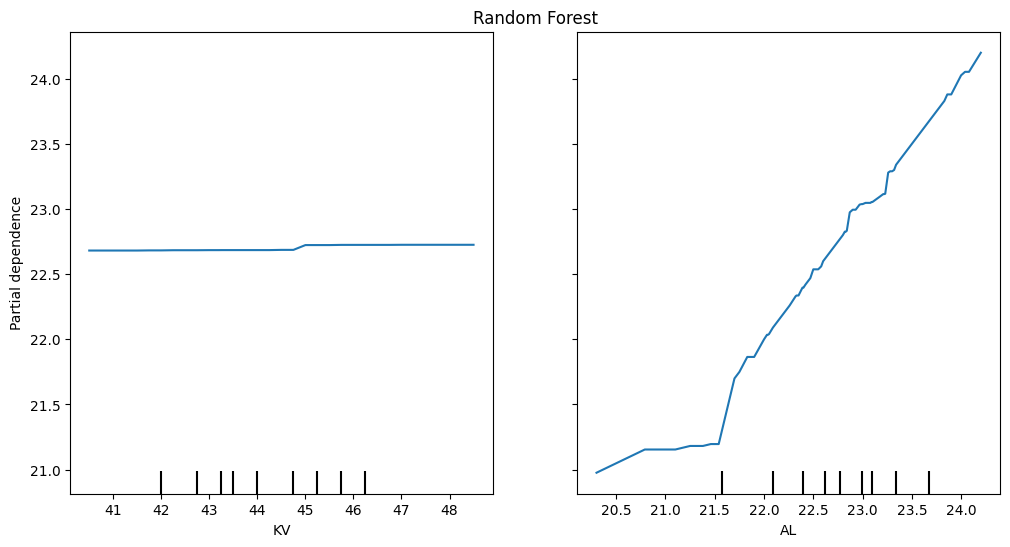

In [76]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Random Forest")
random_display = PartialDependenceDisplay.from_estimator(tree, X, ["KV", "AL"], ax=ax)




# Thank you